In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
import os
import plotly as py
import plotly.graph_objs as go
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)
# import sys
# print(sys.version)

In [2]:
# using ISO-8859-1 due to diferent format from csv while reading the file
df = pd.read_csv('netflix.csv', encoding = "ISO-8859-1")

In [3]:
df.head(5)

,title,rating,rating_level,rating_description,release_year,user_rating_score,user_rating_size,Unnamed: 7,Unnamed: 8
0,0.03,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82,NaN,NaN
1,90210,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2013,62.0,80,NaN,NaN
2,90210,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2013,62.0,80,NaN,NaN
3,90210,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2013,62.0,80,NaN,NaN
4,10 Things I Hate About You,PG-13,"adult content, adult language and mild violence",80,1999,68.0,80,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   rating              1000 non-null   object 
 2   rating_level        941 non-null    object 
 3   rating_description  1000 non-null   int64  
 4   release_year        1000 non-null   int64  
 5   user_rating_score   605 non-null    float64
 6   user_rating_size    1000 non-null   int64  
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [5]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

rating_level null rate: 5.9%
user_rating_score null rate: 39.5%
Unnamed: 7 null rate: 100.0%
Unnamed: 8 null rate: 100.0%


In [6]:
# rating_level has object type so using mode() will the way to handle the missing values
# user_rating_score has int type so using 
# delete columns (unnamed 7, unnamed 8)

df['user_rating_score'] = df['rating_level'].fillna(0)
df = df.drop(['Unnamed: 7', 'Unnamed: 8'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1000 non-null   object
 1   rating              1000 non-null   object
 2   rating_level        941 non-null    object
 3   rating_description  1000 non-null   int64 
 4   release_year        1000 non-null   int64 
 5   user_rating_score   1000 non-null   object
 6   user_rating_size    1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [8]:
# delete missing values
df.dropna(inplace=True)

In [9]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# check dataset info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 995
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               467 non-null    object
 1   rating              467 non-null    object
 2   rating_level        467 non-null    object
 3   rating_description  467 non-null    int64 
 4   release_year        467 non-null    int64 
 5   user_rating_score   467 non-null    object
 6   user_rating_size    467 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 29.2+ KB


In [11]:
df.head(10)

,title,rating,rating_level,rating_description,release_year,user_rating_score,user_rating_size
0,0.03,TV-MA,For mature audiences. May not be suitable for...,110,2016,For mature audiences. May not be suitable for...,82
1,90210,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2013,Parents strongly cautioned. May be unsuitable ...,80
4,10 Things I Hate About You,PG-13,"adult content, adult language and mild violence",80,1999,"adult content, adult language and mild violence",80
5,100 Metros,TV-MA,For mature audiences. May not be suitable for...,110,2016,For mature audiences. May not be suitable for...,82
6,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,110,2017,For mature audiences. May not be suitable for...,80
14,30 Rock,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2012,Parents strongly cautioned. May be unsuitable ...,80
16,5 to 7,R,some sexual material,100,2014,some sexual material,82
18,A Monster in Paris,PG,"some action violence involving gunplay, and mi...",60,2011,"some action violence involving gunplay, and mi...",82
20,A Weekend with the Family,TV-MA,For mature audiences. May not be suitable for...,110,2016,For mature audiences. May not be suitable for...,82
21,"?? Pai, ?? - Look at This",TV-MA,For mature audiences. May not be suitable for...,110,2007,For mature audiences. May not be suitable for...,82


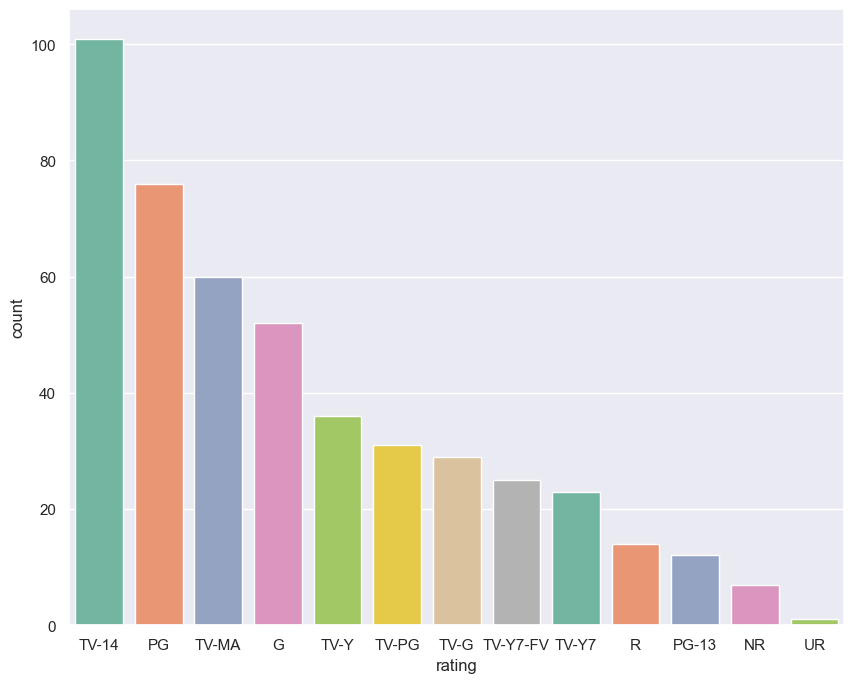

In [12]:
plt.figure(figsize=(10,8))
sns.set(style = "darkgrid")
ax = sns.countplot(x="rating", data = df, palette = "Set2", order=df["rating"].value_counts().index[0:15])

###### Jumlah terbanyak kategori rating yang pertama adalah TV-14, TV-14 merupakan kategori rating yang diperbolehkah untuk penonton dengan usia kurang dari 14 tahun.
###### Jumlah terbanyak kedua adalah PG, PG (Parental Guidance) merupakan kategori rating yang tidak direkomendasikan untuk penonton dengan usia kurang dari 15 tahun tanpa pengawasan dari orang tua, guru atau penjaga/perwakilan orang dewasa.
###### Jumlah terbanyak ketiga adalah TV-MA, TV-MA (Mature Audience Only) merupakan kategori yang dirancang untuk penonton dewasa.

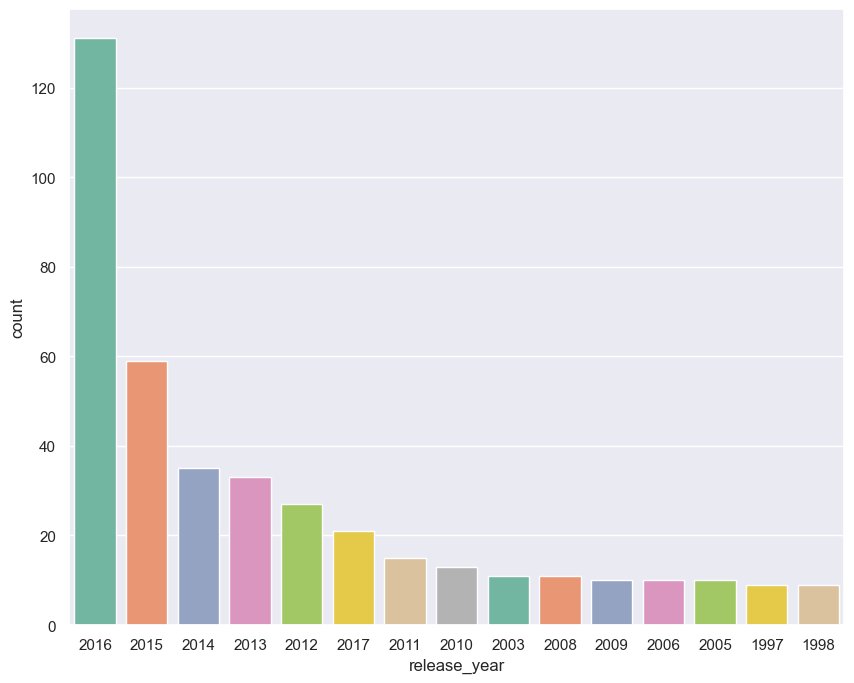

In [13]:
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="release_year", data=df, palette="Set2",
                   order=df["release_year"].value_counts(ascending=False).index[0:15])


###### Jumlah acara terbanyak di release pada tahun 2016 kemudian disusul pada tahun 2015 dan selanjutnya ada pada tahun 2014.

[Text(0, 0, 'Parents strongly cautioned. May be unsuitable for children ages 14 and under.'),
 Text(1, 0, 'Suitable for all ages.'),
 Text(2, 0, 'For mature audiences.  May not be suitable for children 17 and under.'),
 Text(3, 0, 'General Audiences. Suitable for all ages.'),
 Text(4, 0, 'Parental guidance suggested. May not be suitable for all children.')]

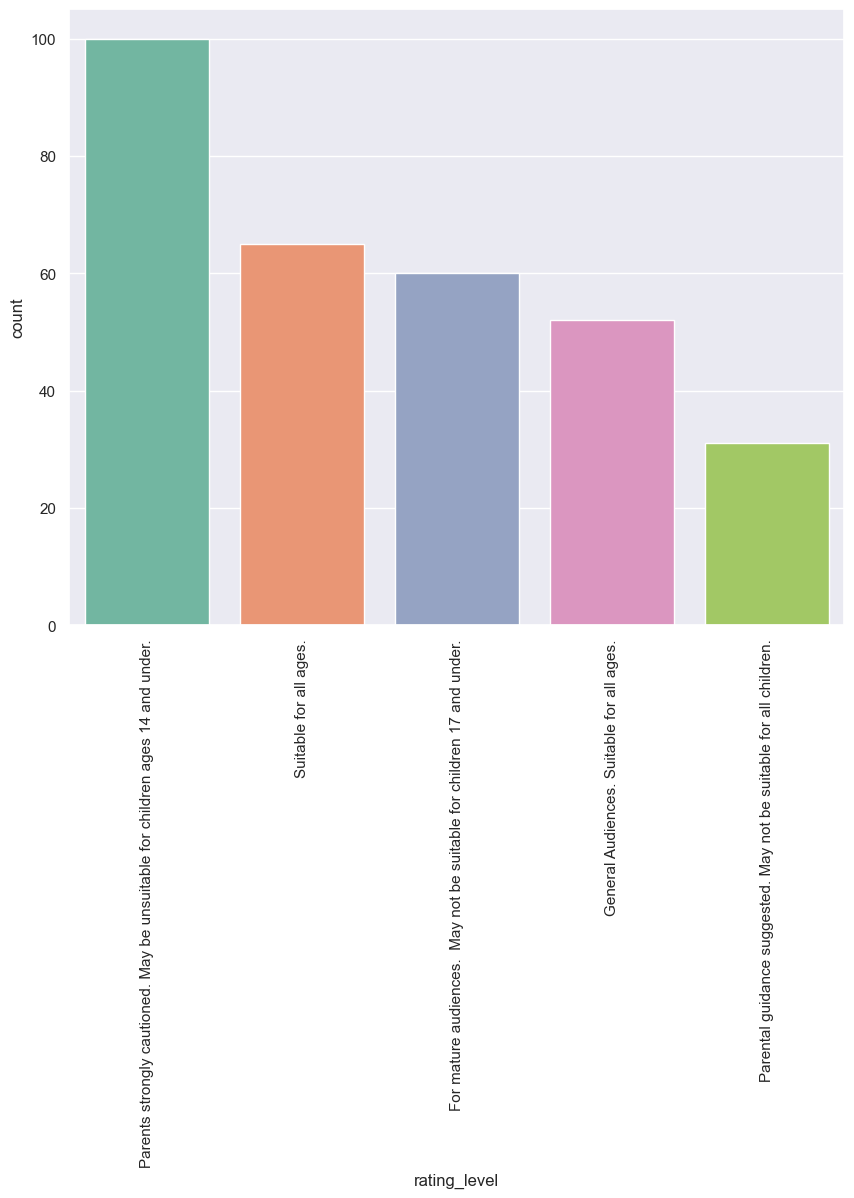

In [14]:
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating_level", data=df, palette="Set2",
                   order=df["rating_level"].value_counts(ascending=False).index[0:5])
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
# ax.figure


In [15]:
import plotly.express as px
top_rated = df[0:10]
fig = px.sunburst(
    top_rated,
    path=['title', 'release_year'],
    values='user_rating_size',
    color='user_rating_size')
fig.show()
